# AIN 214 - PA2 - FALL 2023

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE AN UNDERSTANDABLE AND TRACBLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED YO COMMENT ON YOUR RESULTS OR EPXLAIN YOUR REASONING. ALSO, PLEASE DO NO HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT REPORTING IS A KEY STEP IN DATA SCIENCE.

Deadline: 17.11.2023 (23:59:59)

Submission: Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

# THE STUDENT INFO
# Student Name: Talha Kaba
# Student ID: ****7650\*\*


In [118]:
# imports
import pandas as pd
import sqlite3



# 1st SET OF QUESTIONS: Skyward Travel Agency Data Management Project

Skyward is a premier travel agency aiming to provide seamless experiences for its clients. As business is booming, the agency has a myriad of data points to keep track of, and they need an efficient way to manage it all. Here's what they're dealing with:

- **Clients' Database**: Skyward has a growing list of clients. For each client, they maintain records of their full name, contact email, and phone number. Every client is assigned a unique client ID for efficient tracking and personalized service.

- **Airline Partnerships**: Skyward has collaborations with several airline companies, each identified by a unique airline ID. Beyond just names, they have comprehensive details of all the flights offered by these airline companies. This flight data includes flight numbers, associated airline IDs, departure cities, destinations, and dates of operation.

- **Hotel Affiliations**: Skyward's clients need places to stay, leading to collaborations with multiple hotels. Each hotel is cataloged with a unique ID, alongside its name, geographical location, and a client feedback rating ranging from 1 to 5.

- **Travel Bookings**: Skyward's primary service involves facilitating travel bookings. Every booking, be it for a flight or hotel, gets recorded. Flight bookings include the specific flight number, the client's ID making the booking, and the booking date. Hotel bookings aren't any different with records of the hotel ID, the client's ID, and the duration of stay (check-in and check-out dates).

- **Feedback Mechanism**: Feedback drives Skyward's quality assurance. Clients are encouraged to leave reviews post their trips. For airlines, each review captures the client's ID, the reviewed airline's ID, and the feedback text. Hotel feedback mirrors this, substituting airlines for hotels.

**Data Provision:**
You are provided with unnormalized `feedback_details_df` and `bookings_df` datasets in the form of CSV files.

**Your Task**:

You should design your own DB schema meeting the above-stated constraints. There are multiple ways to design your tables; you only need to ensure that the design fits the outlined requirements. Begin by clearly defining your schema as tables. Once the schema is established, you will tackle a set of SQL tasks that will be provided separately. The SQL tasks will involve writing queries to extract, modify, or add data based on the designed schema. Good luck! 

**Note: Use sqite3 python package for DB**


## Q1. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single soluion here, come up with your own design.

\<**your design here**\>

Example Table:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| table1_id     | PK, int                          |
| table2_id     | FK REFERENCING tabl2, int                          |
| ...     | ...                         |



In [119]:
# your code here
df_booking_details = pd.read_csv("BookingDetails.csv")
df_feedback_details = pd.read_csv("FeedBackDetails.csv")

# create tables
conn = sqlite3.connect('df_boking_details.sqlite3')
c = conn.cursor()

# DELETE TABLES 
# Step 1: Execute a SELECT query to get all table names
c.execute("SELECT name FROM sqlite_master WHERE type='table'")

# Step 2: Fetch all rows
tables = c.fetchall()

# Step 3: Iterate over the rows and drop each table
for table in tables:
    drop_table_command = "DROP TABLE IF EXISTS " + table[0]
    c.execute(drop_table_command)

# Commit the changes
conn.commit()


In [120]:

#connect = sqlite3.connect("df_boking_details.sqlite")
#cursor = connect.cursor()

df_booking_details.to_sql("df_booking", conn, if_exists="replace", index=False)
display(pd.read_sql("select * from df_booking", conn))
 

df_feedback_details.to_sql("df_feedback", conn, if_exists="replace", index=False)
display(pd.read_sql("select * from df_feedback", conn))



# QUERY FOR CUSTOMER TABLE
query_customer = """
        CREATE TABLE customer_table AS
         SELECT DISTINCT CustomerId, CustomerName, CustomerEmail, CustomerPhone
         FROM df_booking
         
"""
# EXECUTE QUERY
c.execute(query_customer)
# FETCH RESULTS
conn.commit()
# DISPLAY RESULTS
display(pd.read_sql("select * from customer_table", conn))




# QUERY FOR FLIGHT TABLE
query_flight = """
            CREATE TABLE flight_table AS
            SELECT DISTINCT  FlightID, AirlineID, AirlineName, Flight_Departure, Flight_Destination
            FROM df_booking
            WHERE FlightId IS NOT NULL
"""
# EXECUTE QUERY
c.execute(query_flight)
conn.commit()

display(pd.read_sql("select * from flight_table", conn))

# QUERY FOR HOTEL TABLE
query_hotel = """
            CREATE TABLE hotel_table AS
            SELECT DISTINCT HotelID , HotelName, HotelLocation, HotelRating 
            FROM df_booking
            WHERE HotelID IS NOT NULL
"""

# EXECUTE QUERY
c.execute(query_hotel)
conn.commit()  

display(pd.read_sql("select * from hotel_table", conn))

# QUERY FOR FLIGHT BOOKING TABLE
query_flight_booking = """
            CREATE TABLE flight_booking_table AS
            SELECT DISTINCT BookingID, CustomerID, FlightID, AirlineID, AirlineName, Flight_Departure, Flight_Destination
            FROM df_booking
            WHERE FlightID IS NOT NULL 

"""
# EXECUTE QUERY
c.execute(query_flight_booking)
conn.commit()
display(pd.read_sql("select * from flight_booking_table", conn))


# QUERY FOR HOTEL BOOKING TABLE
query_hotel_booking = """
            CREATE TABLE hotel_booking_table AS
            SELECT DISTINCT BookingID, CustomerID, HotelID
            FROM df_booking
            WHERE HotelID IS NOT NULL 

"""
# EXECUTE QUERY
c.execute(query_hotel_booking)
conn.commit()
display(pd.read_sql("select * from hotel_booking_table", conn))


# QUERY FOR BOOKING TABLE
query_booking = """
            CREATE TABLE booking_table AS
            SELECT BookingID, CustomerID, CustomerName, FlightID, HotelID
            FROM df_booking
            WHERE BookingID IS NOT NULL 
"""
# EXECUTE QUERY
c.execute(query_booking)
conn.commit()
display(pd.read_sql("select * from booking_table", conn))

,BookingID,CustomerID,CustomerName,CustomerEmail,CustomerPhone,FlightID,Flight_Departure,Flight_Destination,Flight_Date,AirplaneID,AirlineName,HotelID,HotelName,HotelLocation,HotelRating,AirlineID
0,1,6145,Ethan Smith,ethan.smith@mail.com,555-0665405,8513.0,Hong Kong,Barcelona,2024-10-07 16:33:28.557244,None,AirZoom,NaN,None,None,NaN,8533.0
1,2,6145,Ethan Smith,ethan.smith@mail.com,555-0665405,NaN,None,None,None,None,None,1647.0,Silver Villa,Location_42,5.0,NaN
2,3,6145,Ethan Smith,ethan.smith@mail.com,555-0665405,4951.0,Barcelona,Paris,2024-05-31 16:33:28.557253,None,AirZoom,NaN,None,None,NaN,8533.0
3,4,6148,Ethan Martinez,ethan.martinez@mail.com,555-3339628,NaN,None,None,None,None,None,6921.0,Ruby Plaza,Location_4,5.0,NaN
4,5,6148,Ethan Martinez,ethan.martinez@mail.com,555-3339628,NaN,None,None,None,None,None,1919.0,Emerald Motel,Location_50,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,992,6134,Ethan Rodriguez,ethan.rodriguez@mail.com,555-7428799,NaN,None,None,None,None,None,5769.0,Golden Resort,Location_5,1.0,NaN
992,993,6134,Ethan Rodriguez,ethan.rodriguez@mail.com,555-7428799,8290.0,Hong Kong,Dubai,2024-03-05 16:33:28.557151,None,AirNest,NaN,None,None,NaN,9097.0
993,994,6134,Ethan Rodriguez,ethan.rodriguez@mail.com,555-7428799,7243.0,Hong Kong,London,2024-08-17 16:33:28.557143,None,SkyWings,NaN,None,None,NaN,5415.0
994,995,8188,Mia Williams,mia.williams@mail.com,555-2208244,9617.0,Hong Kong,New York,2024-03-30 16:33:28.557277,None,EagleEye,NaN,None,None,NaN,4815.0


,FeedbackID,CustomerID,AirlineID,HotelID,Review
0,3073,7498,6418.0,NaN,Horrible experience with the seat.
1,6658,6744,6418.0,NaN,The cabin cleanliness was impressive.
2,6149,8207,3233.0,NaN,Decent experience with the cabin cleanliness.
3,8198,9382,6418.0,NaN,I found the in-flight entertainment to be aver...
4,8710,3067,2218.0,NaN,The crew was average.
...,...,...,...,...,...
595,8182,4009,NaN,4147.0,Impressive experience with the room.
596,2041,7934,NaN,4656.0,Fantastic experience with the service.
597,6650,2310,NaN,2525.0,The pool was excellent.
598,7164,7798,NaN,5994.0,The service was average.


,CustomerID,CustomerName,CustomerEmail,CustomerPhone
0,6145,Ethan Smith,ethan.smith@mail.com,555-0665405
1,6148,Ethan Martinez,ethan.martinez@mail.com,555-3339628
2,4106,Ethan Rodriguez,ethan.rodriguez@mail.com,555-3077795
3,6156,Mia Rodriguez,mia.rodriguez@mail.com,555-6360055
4,4110,Ethan Martinez,ethan.martinez@mail.com,555-5293267
...,...,...,...,...
495,2016,Ethan Davis,ethan.davis@mail.com,555-4347686
496,4065,Mia Williams,mia.williams@mail.com,555-3213981
497,6117,Logan Martinez,logan.martinez@mail.com,555-6781352
498,6134,Ethan Rodriguez,ethan.rodriguez@mail.com,555-7428799


,FlightID,AirlineID,AirlineName,Flight_Departure,Flight_Destination
0,8513.0,8533.0,AirZoom,Hong Kong,Barcelona
1,4951.0,8533.0,AirZoom,Barcelona,Paris
2,8673.0,8863.0,AirWave,Istanbul,Dubai
3,2794.0,2218.0,JetStream,Kuala Lumpur,London
4,8338.0,6418.0,SkyPace,Istanbul,Barcelona
...,...,...,...,...,...
94,6159.0,8533.0,AirZoom,Hong Kong,Istanbul
95,6888.0,9097.0,AirNest,Paris,Barcelona
96,8285.0,3233.0,FlyHigh,Paris,Singapore
97,2391.0,4815.0,EagleEye,Singapore,Barcelona


,HotelID,HotelName,HotelLocation,HotelRating
0,1647.0,Silver Villa,Location_42,5.0
1,6921.0,Ruby Plaza,Location_4,5.0
2,1919.0,Emerald Motel,Location_50,4.0
3,7428.0,Crystal Motel,Location_3,4.0
4,5095.0,Sapphire Hideaway,Location_39,5.0
5,3670.0,Diamond Villa,Location_29,4.0
6,4927.0,Jade Suites,Location_25,5.0
7,2504.0,Pearl Resort,Location_26,2.0
8,5991.0,Golden Resort,Location_38,3.0
9,6925.0,Ruby Palace,Location_6,1.0


,BookingID,CustomerID,FlightID,AirlineID,AirlineName,Flight_Departure,Flight_Destination
0,1,6145,8513.0,8533.0,AirZoom,Hong Kong,Barcelona
1,3,6145,4951.0,8533.0,AirZoom,Barcelona,Paris
2,7,4106,8673.0,8863.0,AirWave,Istanbul,Dubai
3,9,4106,2794.0,2218.0,JetStream,Kuala Lumpur,London
4,15,2064,8338.0,6418.0,SkyPace,Istanbul,Barcelona
...,...,...,...,...,...,...,...
503,985,2016,7498.0,2974.0,SkyLink,Singapore,Tokyo
504,990,6117,8290.0,9097.0,AirNest,Hong Kong,Dubai
505,993,6134,8290.0,9097.0,AirNest,Hong Kong,Dubai
506,994,6134,7243.0,5415.0,SkyWings,Hong Kong,London


,BookingID,CustomerID,HotelID
0,2,6145,1647.0
1,4,6148,6921.0
2,5,6148,1919.0
3,6,6148,7428.0
4,8,4106,5095.0
...,...,...,...
483,988,4065,4857.0
484,989,6117,7428.0
485,991,6117,8577.0
486,992,6134,5769.0


,BookingID,CustomerID,CustomerName,FlightID,HotelID
0,1,6145,Ethan Smith,8513.0,NaN
1,2,6145,Ethan Smith,NaN,1647.0
2,3,6145,Ethan Smith,4951.0,NaN
3,4,6148,Ethan Martinez,NaN,6921.0
4,5,6148,Ethan Martinez,NaN,1919.0
...,...,...,...,...,...
991,992,6134,Ethan Rodriguez,NaN,5769.0
992,993,6134,Ethan Rodriguez,8290.0,NaN
993,994,6134,Ethan Rodriguez,7243.0,NaN
994,995,8188,Mia Williams,9617.0,NaN


## Q2. Find the total number of bookings made for each hotel. Display the hotel name and the corresponding number of bookings. (10 Points)

In [121]:
# QUERY FOR TOTAL NUMBER OF BOOKINGS MADE FOR EACH HOTEL
query_hotel_booking_count = """
            SELECT h.HotelName, COUNT(hb.HotelID) AS NumberOfBookings
            FROM hotel_booking_table hb
            JOIN hotel_table h ON hb.HotelID = h.HotelID
            GROUP BY h.HotelID
            ORDER BY NumberOfBookings DESC
"""

# EXECUTE QUERY
c.execute(query_hotel_booking_count)
# FETCH RESULTS
hotel_booking_count = c.fetchall()
# CONVERT TO PANDAS DATAFRAME
hotel_booking_count_df = pd.DataFrame(hotel_booking_count, columns=['HotelName', 'NumberOfBookings'])
# DISPLAY RESULTS
display(hotel_booking_count_df)



,HotelName,NumberOfBookings
0,Golden Suites,16
1,Diamond Inn,15
2,Diamond Resort,15
3,Silver Resort,15
4,Emerald Motel,15
5,Emerald Palace,14
6,Diamond Inn,14
7,Diamond Inn,14
8,Golden Inn,14
9,Sapphire Villa,14


## Q3. Retrieve the name and contact details of clients who have provided feedback for both flights and hotels. Ensure there are no duplicate entries in your result. (10 Points)


In [134]:
# THIS QUERY IS USED TO GET THE CUSTOMER ID OF CUSTOMERS WHO HAVE GIVEN 
# FEEDBACK AND OBSERVE THE NUMBER OF UNIQE CUSTOMERS WHO HAVE GIVEN FEEDBACK
query_feedback_customers = """
            SELECT DISTINCT CustomerID
            FROM df_feedback
            
"""
# EXECUTE QUERY
c.execute(query_feedback_customers)
# FETCH RESULTS
feedback_customers = c.fetchall()
# CONVERT TO PANDAS DATAFRAME
feedback_customers_df = pd.DataFrame(feedback_customers, columns=['CustomerID'])
# DISPLAY RESULTS
display(feedback_customers_df)

# QUERY FOR TOTAL NUMBER OF FEEDBACKS GIVEN BY EACH CUSTOMER
query_feedback_count = """
            SELECT CustomerID, COUNT(CustomerId) AS NumberOfFeedbacks
            FROM df_feedback
            WHERE CustomerID IN (
                SELECT CustomerID
                FROM df_feedback
                WHERE AirlineID IS NOT NULL
                INTERSECT
                SELECT CustomerID
                FROM df_feedback
                WHERE HotelID IS NOT NULL
            )
            GROUP BY CustomerID
            ORDER BY NumberOfFeedbacks DESC
"""
# EXECUTE QUERY
c.execute(query_feedback_count)
# FETCH RESULTS
feedback_count = c.fetchall()
# CONVERT TO PANDAS DATAFRAME
feedback_count_df = pd.DataFrame(feedback_count, columns=['CustomerID', 'NumberOfFeedbacks'])
# DISPLAY RESULTS
display(feedback_count_df)



# QUERY FEEDBACK DETAILS, CUSTOMERS THAT HAVE GIVEN FEEDBACK FOR BOTH AIRLINE AND HOTEL
query_feedback_details = """
            SELECT b.CustomerName, b.CustomerEmail, b.CustomerPhone
            FROM df_feedback f
            JOIN df_booking b ON f.CustomerID = b.CustomerID
            GROUP BY b.CustomerID
            HAVING COUNT(DISTINCT f.AirlineID) >= 1 AND COUNT(DISTINCT f.HotelID) >= 1
            
"""
# EXECUTE QUERY
c.execute(query_feedback_details)
# FETCH RESULTS
feedback_details = c.fetchall()
# CONVERT TO PANDAS DATAFRAME
feedback_details_df = pd.DataFrame(feedback_details, columns=['CustomerName', 'CustomerEmail', 'CustomerPhone'])
# DISPLAY RESULTS
display(feedback_details_df)



,CustomerID
0,7498
1,6744
2,8207
3,9382
4,3067
...,...
356,5859
357,6898
358,8700
359,7934


,CustomerID,NumberOfFeedbacks
0,9085,7
1,9796,5
2,6570,5
3,8839,4
4,8410,4
...,...,...
104,1891,2
105,1241,2
106,1094,2
107,1085,2


,CustomerName,CustomerEmail,CustomerPhone
0,Mason Jones,mason.jones@mail.com,555-0497376
1,Olivia Miller,olivia.miller@mail.com,555-8743718
2,Mason Martinez,mason.martinez@mail.com,555-4087377
3,Emma Miller,emma.miller@mail.com,555-9672748
4,Olivia Garcia,olivia.garcia@mail.com,555-0514945
...,...,...,...
104,Ethan Davis,ethan.davis@mail.com,555-0282897
105,John Smith,john.smith@mail.com,555-4394283
106,Mia Williams,mia.williams@mail.com,555-6569856
107,Logan Williams,logan.williams@mail.com,555-2061905


# Report
* There are 360 Customers who provided feedback
* 109 of them have provided feedback more than 1
* The customer who has the most feedback is provided 7 feedbacks
* 109 of Customers have provided feedback for both hotel and flight

## Q4. Identify hotels that have a feedback rating lower than the average feedback rating across all hotels. List their names and ratings. (10 Points)


In [123]:
# CALCULATE THE AVERAGE RATING OF HOTELES
hotel_table_df = pd.read_sql("SELECT * FROM hotel_table", conn)
average = hotel_table_df['HotelRating'].mean()
print("Average Rating of Hotels: ", average)
# QUERY AVERAGE RATING
query_average_rating = f"""
            SELECT h.HotelName, h.HotelRating 
            FROM hotel_table h
            WHERE h.HotelRating < {average}
            GROUP BY h.HotelID
            ORDER BY h.HotelRating DESC
"""
# EXECUTE QUERY
c.execute(query_average_rating)
# FETCH RESULTS
average_rating = c.fetchall()
# CONVERT TO PANDAS DATAFRAME
average_rating_df = pd.DataFrame(average_rating, columns=['HotelName', 'AverageRating'])
# DISPLAY RESULTS
display(average_rating_df)


Average Rating of Hotels:  3.2


,HotelName,AverageRating
0,Ruby Resort,3.0
1,Golden Villa,3.0
2,Pearl Motel,3.0
3,Golden Hideaway,3.0
4,Golden Resort,3.0
5,Golden Inn,3.0
6,Emerald Resort,3.0
7,Golden Plaza,2.0
8,Golden Lodge,2.0
9,Pearl Plaza,2.0


# Report
* Almost Half of the Hotels under the average rating
* All the hotels on this list are named after precious stones

## Q5. Find clients who have stayed in at least three different hotels and flown with at least two different airlines. Display their names and total number of bookings. (10 Points)


In [124]:
# QUERY FOR COUNT NUMBER OF BOOKINGS FOR EACH CUSTOMER
query_booking_count = """
            SELECT CustomerID, COUNT(CustomerID) AS NumberOfBookings
            FROM booking_table
            GROUP BY CustomerID
            ORDER BY NumberOfBookings DESC
            
"""
# EXECUTE QUERY
c.execute(query_booking_count)
# FETCH RESULTS
booking_count = c.fetchall()
# CONVERT TO PANDAS DATAFRAME
booking_count_df = pd.DataFrame(booking_count, columns=['CustomerID', 'NumberOfBookings'])
# DISPLAY RESULTS
display(booking_count_df)


# QUERY FOR SPECIFIC CLIENTS
query_specific_clients = """
            SELECT b.CustomerName, COUNT(DISTINCT hb.HotelID) AS NumHotels, COUNT(DISTINCT fb.AirlineId) AS NumAirlines, COUNT(*) AS NumBookings
            FROM booking_table b
            JOIN hotel_booking_table hb ON b.BookingID = hb.BookingID
            JOIN flight_booking_table fb ON b.BookingID = fb.BookingID
            GROUP BY b.CustomerID
            HAVING COUNT(DISTINCT hb.HotelID) >= 3 AND COUNT(DISTINCT fb.AirlineID) >= 2
"""
# EXECUTE QUERY
c.execute(query_specific_clients)
# FETCH RESULTS
specific_clients = c.fetchall()
# CONVERT TO PANDAS DATAFRAME
specific_clients_df = pd.DataFrame(specific_clients, columns=['CustomerName', 'NumHotels', 'NumAirlines', 'NumBookings'])
# DISPLAY RESULTS
display(specific_clients_df)





,CustomerID,NumberOfBookings
0,9979,3
1,9972,3
2,9954,3
3,9949,3
4,9868,3
...,...,...
495,1204,1
496,1157,1
497,1085,1
498,1045,1


,CustomerName,NumHotels,NumAirlines,NumBookings


# REPORT 

* Since there is no person that have booked more than 3 times (observed from booking_count_df) then there is no client that has stayed 3 different hotel and flown with 2 different airline

## Q6 - **Bonus/Challenge**: Do the same in Q3 without using the keywords: "HAVING" and "GROUP BY". Make a comparison on the two processes (one using the aggregate operators and this) 

In [125]:
# QUERY FEEDBACK DETAILS
query_feedback_details = """
            SELECT DISTINCT b.CustomerName, b.CustomerEmail, b.CustomerPhone
            FROM df_feedback f
            JOIN df_booking b ON f.CustomerID = b.CustomerID
            WHERE f.CustomerID IN (
                SELECT CustomerID
                FROM df_feedback
                WHERE AirlineID IS NOT NULL
                INTERSECT
                SELECT CustomerID
                FROM df_feedback
                WHERE HotelID IS NOT NULL
            )
"""


# EXECUTE QUERY
c.execute(query_feedback_details)
# FETCH RESULTS
feedback_details = c.fetchall()
# CONVERT TO PANDAS DATAFRAME
feedback_details_df = pd.DataFrame(feedback_details, columns=['CustomerName', 'CustomerEmail', 'CustomerPhone'])
# DISPLAY RESULTS
display(feedback_details_df)

,CustomerName,CustomerEmail,CustomerPhone
0,Sophia Rodriguez,sophia.rodriguez@mail.com,555-7717570
1,Ava Jones,ava.jones@mail.com,555-2606180
2,Logan Garcia,logan.garcia@mail.com,555-8723852
3,Sophia Jones,sophia.jones@mail.com,555-5176700
4,Sophia Johnson,sophia.johnson@mail.com,555-8333408
...,...,...,...
104,Ava Davis,ava.davis@mail.com,555-4376898
105,Mia Williams,mia.williams@mail.com,555-4798996
106,Sophia Johnson,sophia.johnson@mail.com,555-2448547
107,Liam Jones,liam.jones@mail.com,555-3294076


# Report
Comparison Q3 and Q6
* In Q3 conditional situation has provided by using HAVING and choosed the ones wanted from question, then grouped by customerID
* In Q6 new table derived from the intersection of customers whom feedbacks has hotel id and flight id (NOT NULL)     

# 2nd SET OF QUESTIONS: DATA ANALYSIS WITH VISUALIZATION TOOLS

In the 2nd part of this hw, you are to deal with the famous dataset of Titanic [1]. Answer the following questions, using visualization tools, and comment on your work.

## Q1. Read the Titanic dataset into a DataFrame. Using a pivot table, analyze the survival rate by gender and class.


In [130]:
titanic_df = pd.read_csv("titanic.csv")

conn_titanic = sqlite3.connect('titanic.sqlite')

c_titanic = conn_titanic.cursor()

titanic_df.to_sql("titanic", conn_titanic, if_exists="replace", index=False)

display(pd.read_sql("select * from titanic", conn_titanic))

# QUERY FOR ANALYSING SURVIVAL RATE BY GENDER AND CLASS
query_gender_class_analysis = """
    SELECT Sex, Pclass, AVG(Survived) AS Survival_Rate
    FROM titanic
    WHERE Survived IS NOT NULL
    GROUP BY Sex, Pclass
    """

# EXECUTE QUERY
c_titanic.execute(query_gender_class_analysis)
# FETCH RESULTS
gender_class_analysis = c_titanic.fetchall()
# CONVERT TO PANDAS DATAFRAME
gender_class_analysis_df = pd.DataFrame(gender_class_analysis, columns = ["Sex", "Pclass", "Survival_Rate"])
# CREATE PIVOT TABLE
pivot_table = pd.pivot_table(gender_class_analysis_df, values='Survival_Rate', index=['Sex'], columns=['Pclass'])
# DISPLAY RESULTS
display(pivot_table)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,None,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,None,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# Report 
* The males who in 1st class their survival rate more than twice according to other males 
* Females survival rate is significantly bigger than males
* Women in 3rd class have a much lower survival rate than others, showing that class distinction makes a difference even in accidents

## Q2. Create a histogram showcasing the age distribution of passengers. Overlay this with a KDE plot. Comment on the most common age group aboard the Titanic.


<AxesSubplot: xlabel='Age', ylabel='Count'>

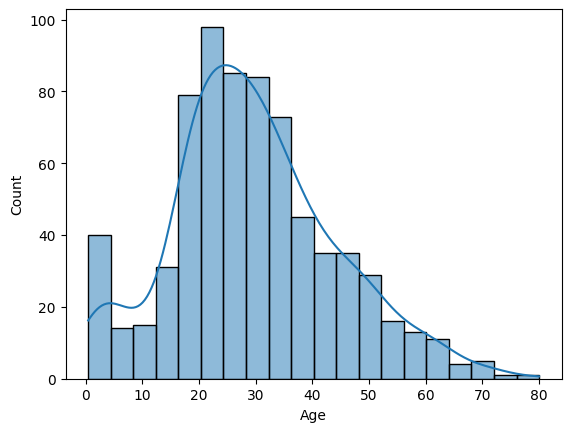

In [127]:
import seaborn as sns

# CREATE HISTOGRAM FOR AGE DISTRIBUTION OF PASSENGERS ON TITANIC WITH KDE PLOT
plt = sns.histplot(data=titanic_df, x="Age", kde=True)

plt


# Report 
* Most of the passengers are younger than 35

## Q3. Using a pie chart, illustrate the embarkation points for Titanic passengers. Identify the port with the highest boarding. Analyze the age and sex distribution from this port. Does this distribution reflect the "women and children first" evacuation policy?

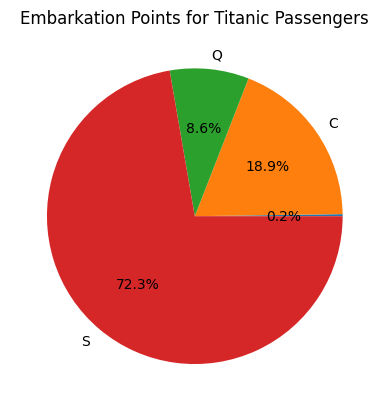

The port with the highest boarding is S


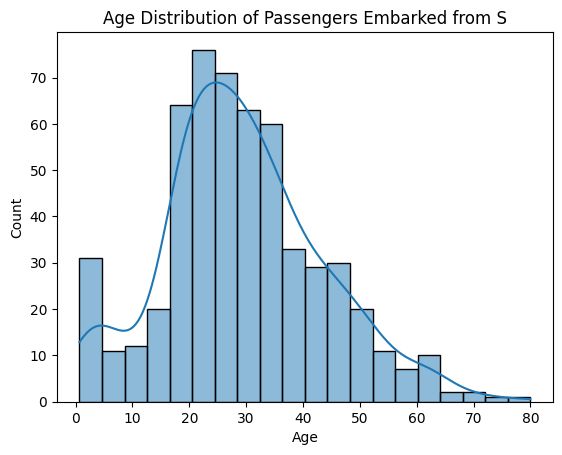

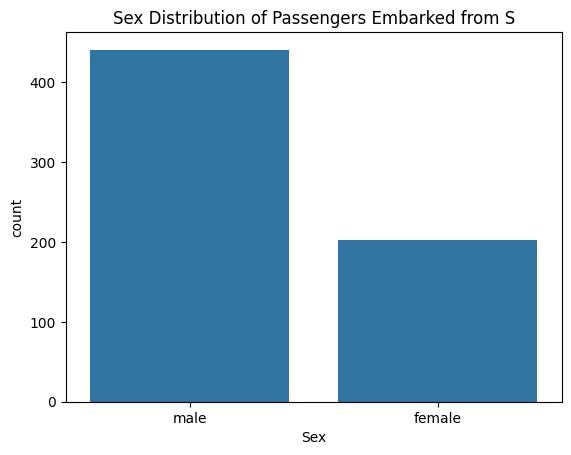

The survival rate for women and children embarked from S is 0.64
The survival rate for men embarked from S is 0.15


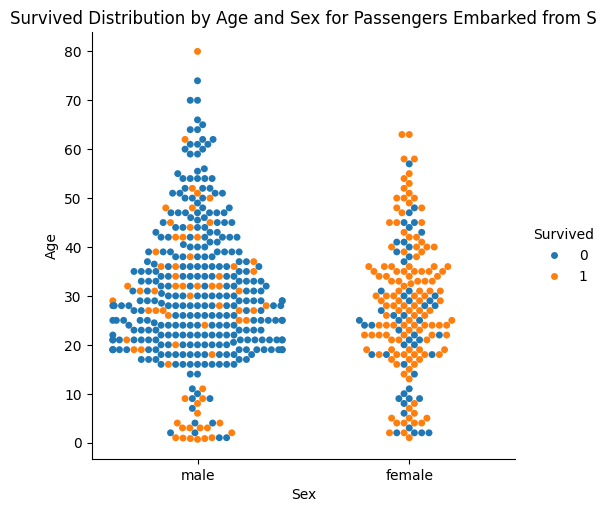

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
# QUERY FOR EMBARKATION POINTS
query_embarkation_points = """
    SELECT Embarked, COUNT(*) AS Count
    FROM titanic
    GROUP BY Embarked
    """

# EXECUTE QUERY
c_titanic.execute(query_embarkation_points)
# FETCH RESULTS
embarkation_points = c_titanic.fetchall()
# CONVERT TO PANDAS DATAFRAME
embarkation_points_df = pd.DataFrame(embarkation_points, columns = ["Embarked", "Count"])

# CREATE PIE CHART
plt.pie(embarkation_points_df["Count"], labels=embarkation_points_df["Embarked"], autopct='%1.1f%%')

# ADD TITLE
plt.title("Embarkation Points for Titanic Passengers")

# SHOW PLOT

plt.show()
# IDENTIFY THE PORT WITH THE HIGHEST BOARDING
highest_boarding_port = embarkation_points_df.sort_values(by="Count", ascending=False).iloc[0]["Embarked"]
print(f"The port with the highest boarding is {highest_boarding_port}")

# FILTER THE TITANIC DATAFRAME BY THE PORT WITH THE HIGHEST BOARDING
highest_boarding_df = titanic_df[titanic_df["Embarked"] == highest_boarding_port]

# CREATE HISTOGRAM WITH KDE PLOT FOR AGE DISTRIBUTION
sns.histplot(data=highest_boarding_df, x="Age", kde=True)

# ADD TITLE
plt.title(f"Age Distribution of Passengers Embarked from {highest_boarding_port}")

# SHOW PLOT
plt.show()

# CREATE COUNT PLOT FOR SEX DISTRIBUTION
sns.countplot(data=highest_boarding_df, x="Sex")

# ADD TITLE
plt.title(f"Sex Distribution of Passengers Embarked from {highest_boarding_port}")

# SHOW PLOT

plt.show()

# CALCULATE SURVIVAL RATE FOR WOMEN AND CHILDREN
women_and_children_df = highest_boarding_df[(highest_boarding_df["Sex"] == "female") | (highest_boarding_df["Age"] < 18)]
women_and_children_survival_rate = women_and_children_df["Survived"].mean()

# CALCULATE SURVIVAL RATE FOR MEN
men_df = highest_boarding_df[(highest_boarding_df["Sex"] == "male") & (highest_boarding_df["Age"] >= 18)]
men_survival_rate = men_df["Survived"].mean()

# PRINT SURVIVAL RATES
print(f"The survival rate for women and children embarked from {highest_boarding_port} is {women_and_children_survival_rate:.2f}")
print(f"The survival rate for men embarked from {highest_boarding_port} is {men_survival_rate:.2f}")

# CREATE A COUNT PLOT FOR SURVIVED DISTRIBUTION BY AGE AND SEX
sns.catplot(data=highest_boarding_df, x="Sex", y="Age", hue="Survived", kind="swarm")

# ADD TITLE
plt.title(f"Survived Distribution by Age and Sex for Passengers Embarked from {highest_boarding_port}")

# SHOW PLOT
plt.show()







# Report
* The port with the highest boarding Southampton, U.K (S)
* The age distribution of passengers embarked from Southamton is similar to the Titanic's distribution (Q1) since more than 70 percent of the population from Southamton int Titanic. Most of the passengers are young and middle aged and there are a considerable number of babies.
* The Sex Distribution of passengers embarked form Southamton, there are twice as many men as women.
* Women and Childeren first policy has been ensured since the survival rate for women and childeren is quite high compared to the man survival rate (nearly 4 times).

## Q4. Create a scatter plot comparing age and fare. Comment on any correlations or patterns you observe.

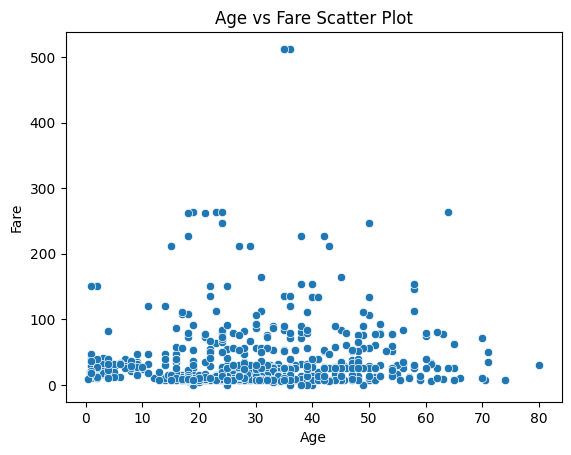

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# CREATE A SCATTER PLOT FOR AGE VS FARE
sns.scatterplot(data=titanic_df, x="Age", y="Fare")

# ADD LABELS AND TITLE
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare Scatter Plot")

plt.show()


# Report
* Most of the passengers paid fare under 100 dollars
* Passengers that bought 1st and 2nd class tickets are mostly between 20 and 40 years old 
* The points, vertically and horizontally lined up in a single row tells us that: vertically, it means that individuals of the same age have bought tickets at different prices; horizontally, it means that individuals of different ages have bought tickets at the same price
* For each child between 0 and 18 years of age, assuming that a ticket is purchased in the same class as the parent and that the same fare is paid for the ticket, we can assume that the points between 0 and 18 years of age are horizontally aligned with their parents. 


## Q5. Group the dataset by 'Embarked' and 'Pclass' and visualize the mean fare for each combination using a bar chart. Comment on the fare differences based on embarkation ports and classes.


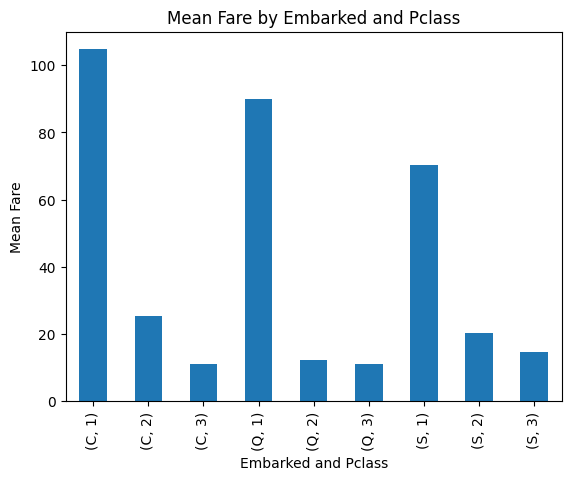

In [87]:
import matplotlib.pyplot as plt

# GROUP THE DATA BY EMBARKED AND PCLASS AND CALCULATE THE MEAN FARE
fare_by_embarked_and_pclass = titanic_df.groupby(['Embarked', 'Pclass'])['Fare'].mean()

# PLOT THE MEAN FARE BY EMBARKED AND PCLASS
fare_by_embarked_and_pclass.plot(kind='bar')

# ADD LABELS AND TITLE
plt.xlabel("Embarked and Pclass")
plt.ylabel("Mean Fare")
plt.title("Mean Fare by Embarked and Pclass")

plt.show()



# Report Queesntown, Ireland   Cherbourg, France Southamton
* The most expensive fares are in Cherbourg , France 
* In Queenstown 2nd and 3rd class hass almost equal fares by average
* Queenstown's 1st class tickets are more expensive than Southamton, but the opposite is true for 2nd and 3rd class tickets
* For 1st class mean fares as follows Cherbourg > Queenstown > Southamton
* For 3rd class mean fares as follows Southamton > Queenstown > Cherbourg

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **USE THEM RESPONSIBLY**. For example, you can utilize them to enhance understanding and support your original work, not to replace it. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.


# REFERENCES
[1] Kaggle. (2023). Titanic: Machine Learning from Disaster [Data set]. Kaggle Inc. https://www.kaggle.com/c/titanic/data

# ACKNOWLEDGMENTS

• The design and development of this homework have been assisted by AI tools, with a special mention to ChatGPT for its assistance in conceptualizing the assignment and refining the wording. 
